### we have taken a simple equation y = 3x1 + 2x2 + 5.

In [ ]:
import numpy as np
x1 = np.random.rand(2188, 1)
x2 = np.random.rand(2188, 1)

In [ ]:
x1

array([[0.52301646],
       [0.74702548],
       [0.19603026],
       ...,
       [0.39668116],
       [0.24515308],
       [0.27815599]])

In [ ]:
x2

array([[0.85317326],
       [0.77199846],
       [0.49481753],
       ...,
       [0.05610378],
       [0.94462971],
       [0.34042179]])

In [ ]:
x1 = x1.reshape(-1)
x1

array([0.52301646, 0.74702548, 0.19603026, ..., 0.39668116, 0.24515308,
       0.27815599])

In [ ]:
x2 = x2.reshape(-1)
x2

array([0.85317326, 0.77199846, 0.49481753, ..., 0.05610378, 0.94462971,
       0.34042179])

In [ ]:
y = 3*x1 + 2*x2 + 5
y

array([8.27539591, 8.78507335, 6.57772586, ..., 6.30225103, 7.62471866,
       6.51531157])

In [ ]:
import pandas as pd
x = pd.DataFrame({'X1': x1,
                 'X2': x2})
x

,X1,X2
0,0.523016,0.853173
1,0.747025,0.771998
2,0.196030,0.494818
3,0.854017,0.793366
4,0.244641,0.359749
...,...,...
2183,0.335251,0.313741
2184,0.240151,0.677667
2185,0.396681,0.056104
2186,0.245153,0.944630


In [ ]:
# sort the data
df = x.copy()
df['Y'] = y
df

,X1,X2,Y
0,0.523016,0.853173,8.275396
1,0.747025,0.771998,8.785073
2,0.196030,0.494818,6.577726
3,0.854017,0.793366,9.148781
4,0.244641,0.359749,6.453420
...,...,...,...
2183,0.335251,0.313741,6.633236
2184,0.240151,0.677667,7.075786
2185,0.396681,0.056104,6.302251
2186,0.245153,0.944630,7.624719


In [ ]:
df1 = df.sort_values(by='Y', ascending=True)
df1

,X1,X2,Y
417,0.010379,0.001056,5.033249
244,0.013410,0.006796,5.053820
1311,0.024059,0.015697,5.103569
560,0.019629,0.040115,5.139116
976,0.024327,0.034801,5.142583
...,...,...,...
435,0.950346,0.995028,9.841094
477,0.965104,0.973294,9.841899
861,0.980063,0.956938,9.854065
281,0.967458,0.979064,9.860502


In [ ]:
number_of_train_data = int(len(df)*0.75)
number_of_test_data = int(len(df)*0.25)
number_of_train_data, number_of_test_data

(1641, 547)

In [ ]:
df1 = df1.reset_index(drop=True)
df1

,X1,X2,Y
0,0.010379,0.001056,5.033249
1,0.013410,0.006796,5.053820
2,0.024059,0.015697,5.103569
3,0.019629,0.040115,5.139116
4,0.024327,0.034801,5.142583
...,...,...,...
2183,0.950346,0.995028,9.841094
2184,0.965104,0.973294,9.841899
2185,0.980063,0.956938,9.854065
2186,0.967458,0.979064,9.860502


In [ ]:
x = df1.drop(['Y'], axis=1)
y = df1['Y']

x_test = x.iloc[:number_of_test_data, :]
x_train = x.iloc[number_of_test_data:, :]

y_test = y[:number_of_test_data]
y_train = y[number_of_test_data:]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import mean_absolute_error as mae
lr.fit(x_train, y_train)
test_pred = lr.predict(x_test)
train_pred = lr.predict(x_train)
test_mae = mae(y_test, test_pred)
train_mae = mae(y_train, train_pred)
test_mae, train_mae

(8.605750684480189e-17, 2.5654879399016413e-16)

In [ ]:
import numpy as np
regression_line = np.polyfit(y_train, train_pred, 1)
regression_fn = np.poly1d(regression_line)
regression_fn

poly1d([1.00000000e+00, 1.28273955e-15])

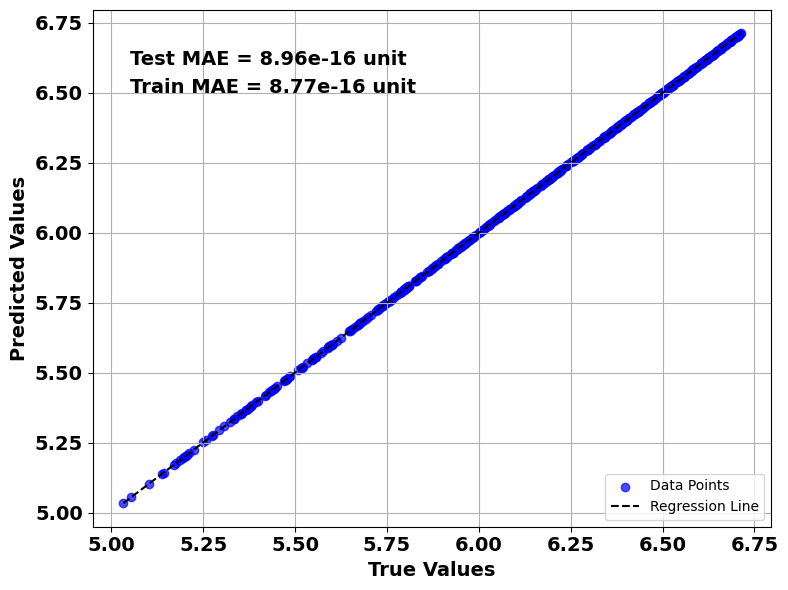

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inputs are numpy arrays
y_test = np.array(y_test)
test_pred = np.array(test_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, color='blue', alpha=0.7, label='Data Points')

# Reference line y = x
min_val = min(y_test.min(), test_pred.min())
max_val = max(y_test.max(), test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Regression Line')

# Labels and aesthetics
plt.xlabel('True Values', weight='bold', fontsize=14 )
plt.ylabel('Predicted Values', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=14)
plt.text(5.05, 6.6,"Test MAE = 8.96e-16 unit", weight='bold', fontsize = 14)
plt.text(5.05, 6.5,"Train MAE = 8.77e-16 unit", weight='bold', fontsize = 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
test_xgbr = xgbr.predict(x_test)
train_xgbr = xgbr.predict(x_train)
test_xgbr_mae = mae(y_test, test_xgbr)
train_xgbr_mae = mae(y_train, train_xgbr)
test_xgbr_mae, train_xgbr_mae

(0.49164426659175536, 0.007062591250989898)

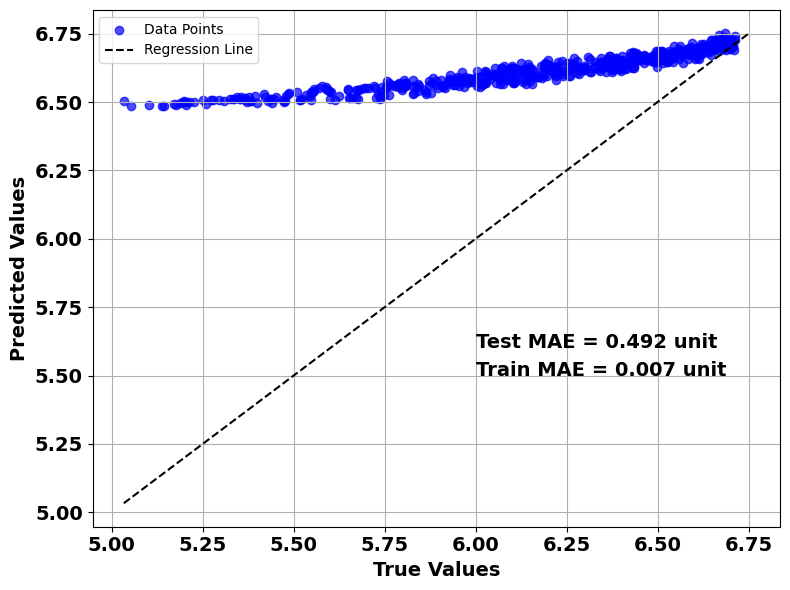

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inputs are numpy arrays
y_test = np.array(y_test)
test_xgbr = np.array(test_xgbr)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_xgbr, color='blue', alpha=0.7, label='Data Points')

# Reference line y = x
min_val = min(y_test.min(), test_xgbr.min())
max_val = max(y_test.max(), test_xgbr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Regression Line')

# Labels and aesthetics
plt.xlabel('True Values', weight='bold', fontsize=14 )
plt.ylabel('Predicted Values', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=14)
plt.text(6.00, 5.60,"Test MAE = 0.492 unit", weight='bold', fontsize = 14)
plt.text(6.00, 5.50,"Train MAE = 0.007 unit", weight='bold', fontsize = 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
a = df.drop(['Y'], axis=1)
b = df['Y']

from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=42)
xgbr.fit(a_train, b_train)
test_xgbr_df = xgbr.predict(a_test)
train_xgbr_df = xgbr.predict(a_train)
test_xgbr_mae_df = mae(b_test, test_xgbr_df)
train_xgbr_mae_df = mae(b_train, train_xgbr_df)
test_xgbr_mae_df, train_xgbr_mae_df

(0.029752839827137206, 0.00699907125359624)

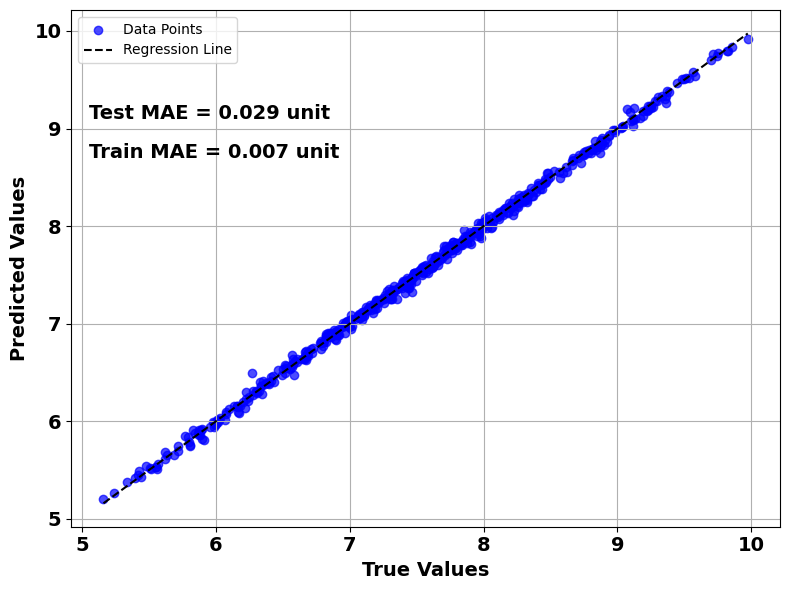

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure inputs are numpy arrays
b_test = np.array(b_test)
test_xgbr_df = np.array(test_xgbr_df)

plt.figure(figsize=(8, 6))
plt.scatter(b_test, test_xgbr_df, color='blue', alpha=0.7, label='Data Points')

# Reference line y = x
min_val = min(b_test.min(), test_xgbr_df.min())
max_val = max(b_test.max(), test_xgbr_df.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Regression Line')

# Labels and aesthetics
plt.xlabel('True Values', weight='bold', fontsize=14 )
plt.ylabel('Predicted Values', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=14)
plt.text(5.05, 9.1,"Test MAE = 0.029 unit", weight='bold', fontsize = 14)
plt.text(5.05, 8.7,"Train MAE = 0.007 unit", weight='bold', fontsize = 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()